<a href="https://colab.research.google.com/github/davidagapitoq/data_science_for_business_2023/blob/main/Supervised_models/Linear_regression/Lab_Boston_Housing_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<img src="https://storage.googleapis.com/kaggle-datasets-images/1379/2485/a52db2794593657403a4235bfc4147aa/dataset-cover.jpg
" width="1000" height="300" >


<h1 align=center><font size = 5>Boston Housing</font></h1>

---

## Introducción


En este laboratorio, aprenderá a usar python para construir un modelo de regresión.


<h3>Objetivo de este Notebook<h3>    
<h5> 1. Como construir e interpretar un modelo de regresión.</h5>
<h5> 2. Descargar y limpiar un Dataset </h5>
<h5> 3. Realizar los pasos necesarios previos a la etapa de modelamiento </h5>
<h5> 4. Entrenar y Testear modelo </h5>     

## Tabla de Contenidos

<div class="alert alert-block alert-info" style="margin-top: 20px">

<font size = 3>
    
1. <a href="#item31">Importar Librerías</a>  
2. <a href="#item32">Descargar y limpiar el Dataset</a>  
3. <a href="#item33">Pre-selección de variables</a>
4. <a href="#item33">Preparación de datos</a>
5. <a href="#item33">Construir un modelo de regresión lineal</a>  
6. <a href="#item34">Entrenar y Testear el modelo</a>  

</font>
</div>

## Descargar y limpiar Dataset


Primero, importemos algunos módulos comunes, asegurémonos de que MatplotLib tenga una configuración adecuada para el tamaño de nuestros gráficos. También verificamos que Python 3.5 o posterior esté instalado (aunque Python 2.x puede funcionar, está obsoleto), así como Scikit-Learn ≥0.20.

In [1]:
# Scikit-Learn
import sklearn

# Imports comunes
import pandas as pd
import numpy as np

# Configuración de tamaño de gráficos matplotlib
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Cargar seaborn
import seaborn as sns
sns.set(style="whitegrid", color_codes = True)
sns.set(rc={'figure.figsize':(10,6)})


<b>Valores de la vivienda en los suburbios de Boston</b>

<h5>La variable <b>medv</b> es la variable objetivo.</h5>

<b>Descripción de datos</b>

El data frame de Boston tiene 506 filas y 14 columnas.

<b>Este data frame contiene las siguientes columnas:</b>

---

* <b>crim : </b> Tasa de criminalidad per cápita por ciudad.

* <b>zn : </b> Proporción de terreno residencial dividido en zonas para lotes de más de 25,000 pies cuadrados.

* <b>indus : </b> Proporción de acres comerciales no minoristas por ciudad.

* <b>chas : </b> Variable ficticia de Charles River (= 1 si el tramo limita con el río; 0 en caso contrario).

* <b>nox : </b>Concentración de óxidos de nitrógeno (partes por 10 millones).

* <b>rm : </b>Número medio de habitaciones por vivienda.

* <b>años : </b> Proporción de unidades ocupadas por sus propietarios construidas antes de 1940.

* <b>dis : </b>Media ponderada de las distancias a cinco centros de empleo de Boston.

* <b>rad : </b>Indice de accesibilidad a carreteras radiales.

* <b>impuesto : </b>Tasa de impuesto a la propiedad de valor total por \$ 10,000.

* <b>ptratio : </b>Proporción alumno-profesor por ciudad.

* <b>black : </b> 1000 (Bk - 0.63) ^ 2 donde Bk es la proporción de negros por ciudad.

* <b>lstat : </b>Estatus más bajo de la población (porcentaje).

* <b>medv : </b>Valor medio de las viviendas ocupadas por sus propietarios en \$ 1000.

---

<strong>Puede consultar este [link](https://kaggle.com/c/boston-housing) para leer más sobre la fuente de datos boston housing.</strong>

<strong>Puede descargar la data en este [link](https://www.kaggle.com/datasets/altavish/boston-housing-dataset)</strong>


## 1. Leyendo y Explorando data

In [2]:
#cargamos la data

pddf = pd.read_csv('HousingData 2.csv')

In [3]:
pddf.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [4]:
pddf.shape

(506, 14)

In [5]:
# Vamos a describir la información
pddf.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
CRIM,486.0,3.611874,8.720192,0.00632,0.081900,0.253715,3.560263,88.9762
ZN,486.0,11.211934,23.388876,0.00000,0.000000,0.000000,12.500000,100.0000
INDUS,486.0,11.083992,6.835896,0.46000,5.190000,9.690000,18.100000,27.7400
CHAS,486.0,0.069959,0.255340,0.00000,0.000000,0.000000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.538000,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.208500,6.623500,8.7800
AGE,486.0,68.518519,27.999513,2.90000,45.175000,76.800000,93.975000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.207450,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.000000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.000000,666.000000,711.0000


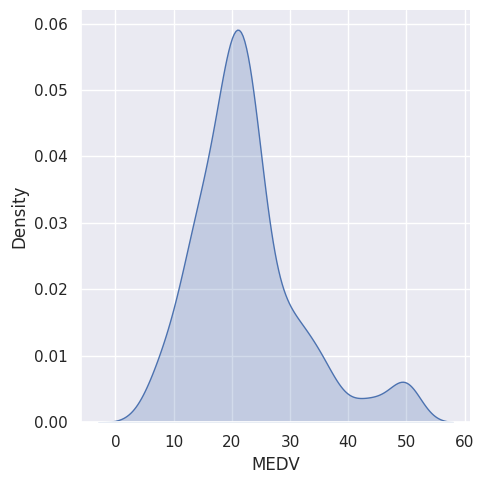

In [6]:
# Gráfico de distribución
sns.displot(pddf.MEDV, kind="kde", fill=True)

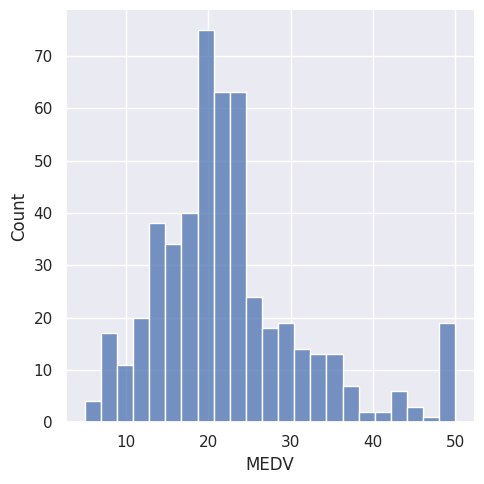

In [7]:
sns.displot(pddf.MEDV, fill=True)

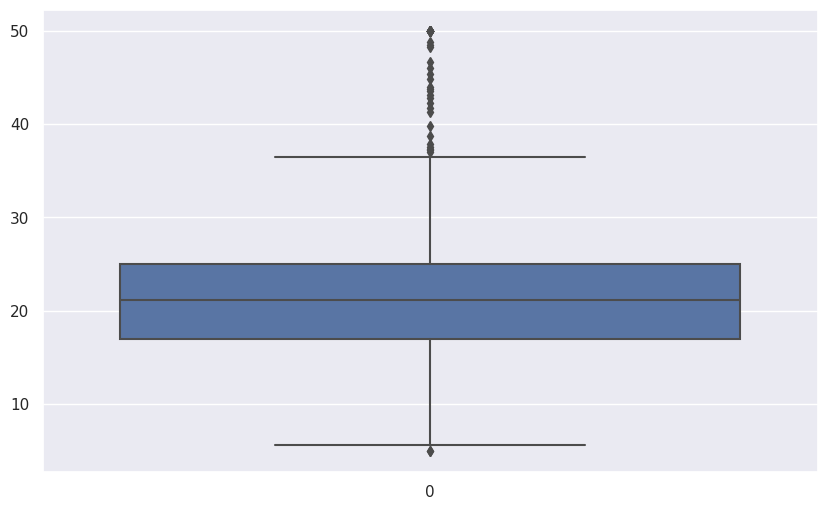

In [8]:
ax = sns.boxplot(data=pddf.MEDV, orient="v")

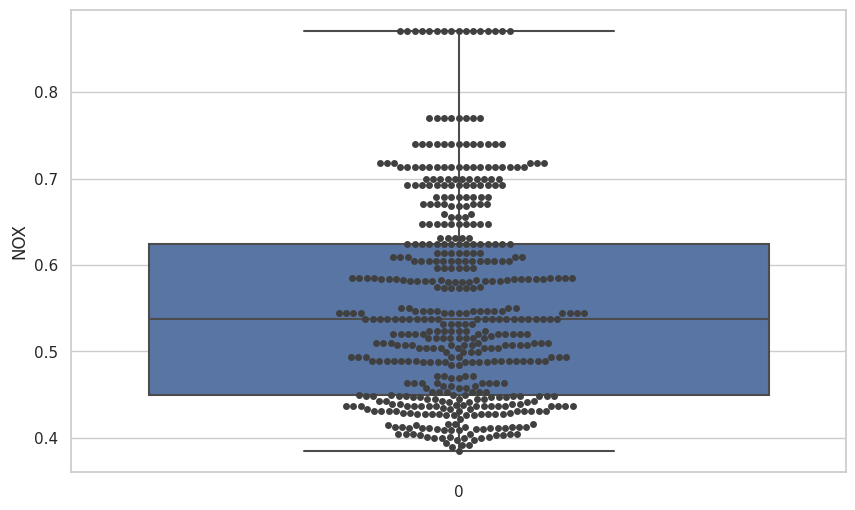

In [9]:
#Boxplot
sns.set_theme(style="whitegrid")
ax = sns.boxplot(data=pddf.NOX, orient="v")
ax = sns.swarmplot(data=pddf.NOX, color=".25")


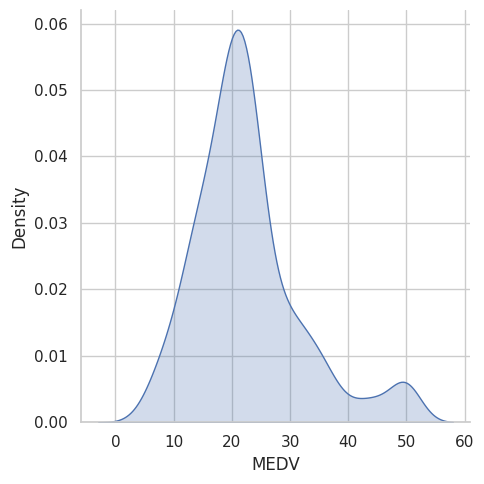

In [10]:
sns.displot(pddf.MEDV, kind="kde", fill=True)

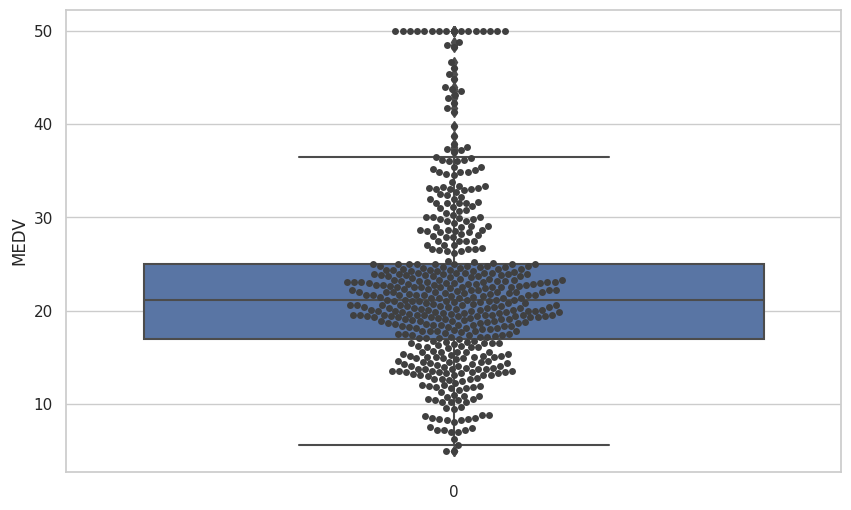

In [11]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(data=pddf.MEDV, orient="v")
ax = sns.swarmplot(data=pddf.MEDV, color=".25")

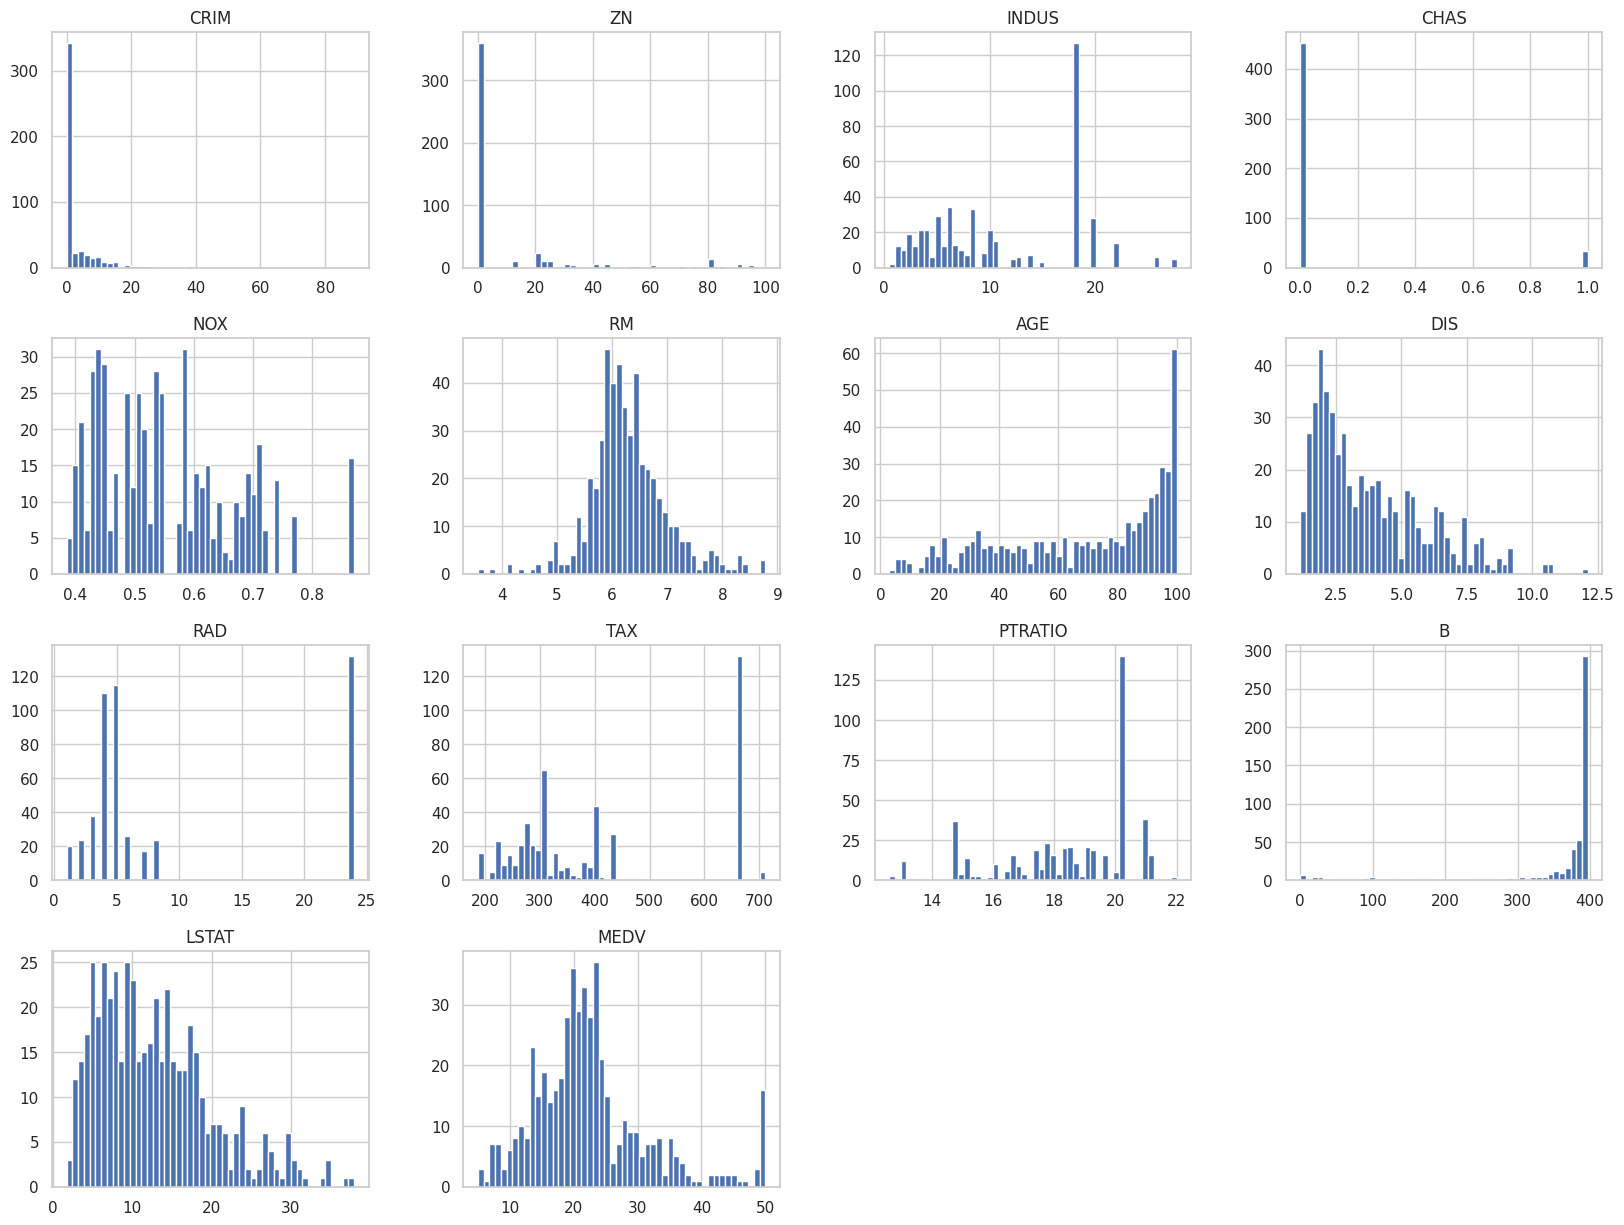

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
pddf.hist(bins=50, figsize=(20,15))
plt.show()

## 2. Selección de muestras

In [13]:
pddf.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [14]:
# Muestreo
from sklearn.model_selection import train_test_split

train, test = train_test_split(pddf,
                               train_size = 0.7,
                               random_state = 123)


In [15]:
print(pddf.shape)
print(train.shape)
print(test.shape)


(506, 14)
(354, 14)
(152, 14)


Text(0, 0.5, '$y$')

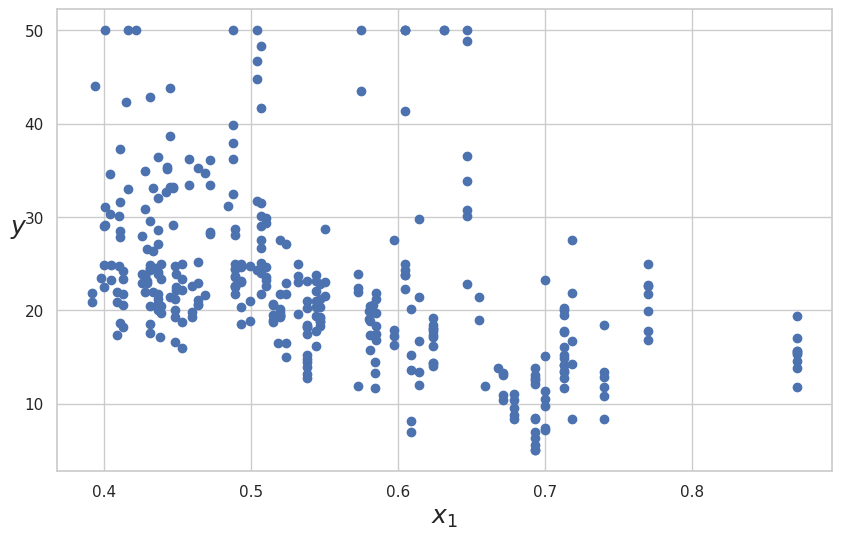

In [16]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,6)

plt.scatter(train.NOX, train.MEDV)
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)

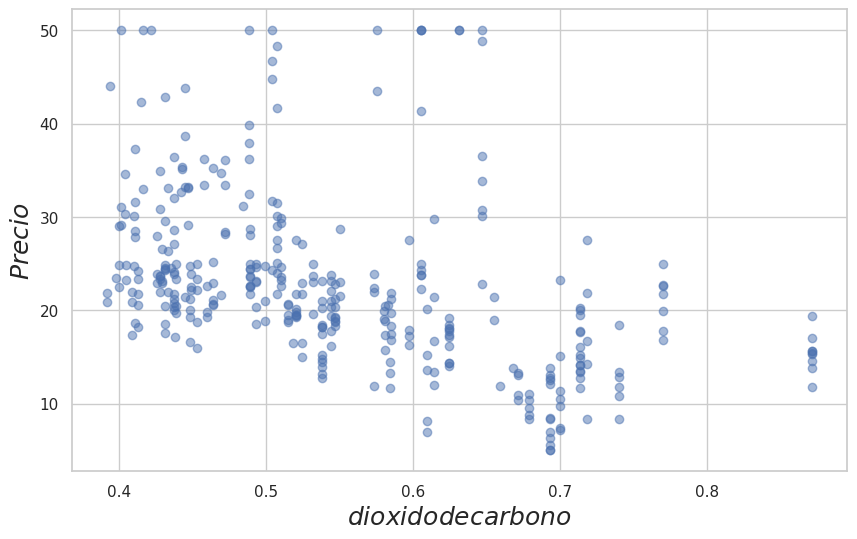

In [17]:
plt.scatter(train.NOX, train.MEDV, alpha = 0.5)
plt.xlabel("$dioxido de carbono$", fontsize=18)
plt.ylabel("$Precio$", rotation=90, fontsize=18)
plt.show()

In [18]:
train[['NOX', 'MEDV']].corr()

,NOX,MEDV
NOX,1.000000,-0.442008
MEDV,-0.442008,1.000000


In [ ]:
# Matriz de scatterplots
from pandas.plotting import scatter_matrix
scatter_matrix(train, figsize=(30, 20))


**Ejercicio**

* Indique ¿cuál de las tres variables presenta mayor relación con la variable objetivo? (RM, AGE, LSTAT)
* Esta variable, sigue una relación lineal? de qué tipo y con qué intensidad?

In [19]:
train[['RM', 'MEDV']].corr()

,RM,MEDV
RM,1.000000,0.744229
MEDV,0.744229,1.000000


Text(0, 0.5, '$y$')

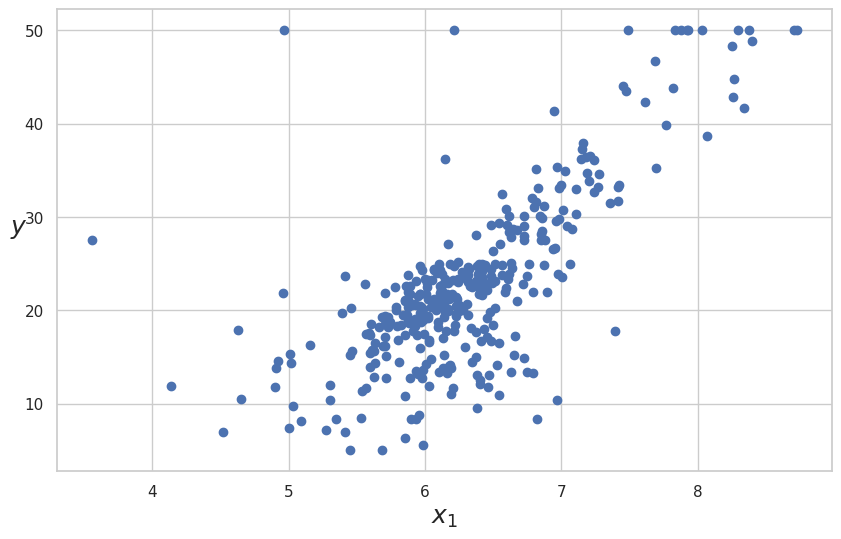

In [23]:
plt.rcParams["figure.figsize"] = (10,6)

plt.scatter(train.RM, train.MEDV)
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)

In [21]:
train[['AGE', 'MEDV']].corr()

,AGE,MEDV
AGE,1.000000,-0.407618
MEDV,-0.407618,1.000000


In [20]:
train[['LSTAT', 'MEDV']].corr()

,LSTAT,MEDV
LSTAT,1.000000,-0.744705
MEDV,-0.744705,1.000000


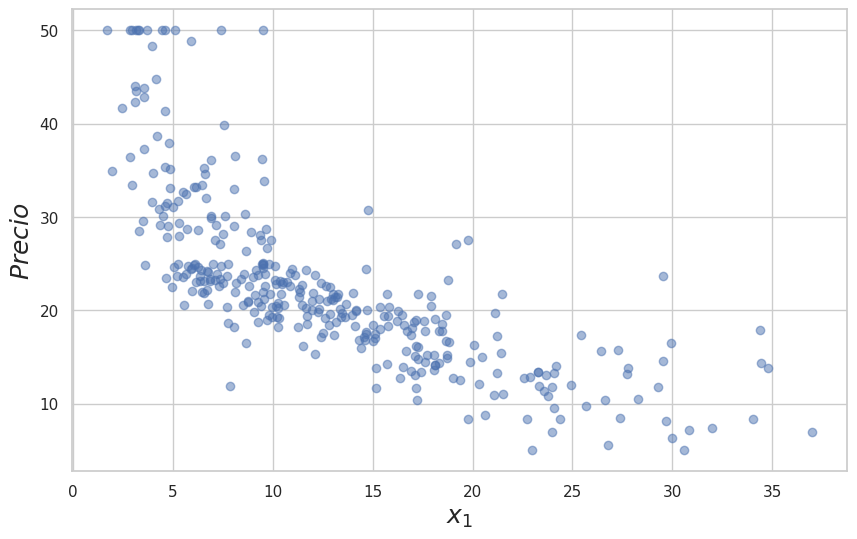

In [25]:
plt.scatter(train.LSTAT, train.MEDV, alpha = 0.5)
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$Precio$", rotation=90, fontsize=18)
plt.show()

## 3. Pre-selección de variables

In [26]:
# Dando formato a nuestra tabla resumen

pdResume = train.describe().transpose()


pdResume.reset_index(inplace = True)
pdResume.rename(columns = {'index' : 'feature',
                           '25%' : 'Q1',
                           '50%' : 'median',
                           '75%' : 'Q3'}, inplace = True)


In [27]:
pdResume[['missing_rate']] = 1 - pdResume[['count']]/train.shape[0]
pdResume.sort_values(by = 'missing_rate', ascending = False, inplace = True)


In [28]:
# Calculando las correlaciones de todas las variables con el target

correlations = train.corr()[['MEDV']]
correlations.reset_index(inplace = True)
correlations.rename(columns = {'index' : 'feature',
                               'MEDV' : 'corr'}, inplace = True)


In [29]:
# Cruzando correlaciones con la tabla de resumen original

pdResume2 = pd.merge(pdResume, correlations, on = 'feature')
pdResume2.head()

,feature,count,mean,std,min,Q1,median,Q3,max,missing_rate,corr
0,INDUS,337.0,10.831128,6.802785,0.46,5.190,8.56,18.10,27.74,0.048023,-0.507507
1,ZN,338.0,11.186391,22.991758,0.00,0.000,0.00,12.50,100.00,0.045198,0.373650
2,AGE,338.0,67.640828,28.155932,6.20,42.575,76.25,92.90,100.00,0.045198,-0.407618
3,CHAS,340.0,0.058824,0.235641,0.00,0.000,0.00,0.00,1.00,0.039548,0.108482
4,LSTAT,341.0,12.753138,7.274235,1.73,6.930,11.10,17.16,36.98,0.036723,-0.744705


In [30]:
pdResume2['abs_corr'] = pdResume2['corr'].apply(lambda x: abs(x))
pdResume2.sort_values(by = 'abs_corr', ascending = False, inplace=True)
pdResume2.head()

,feature,count,mean,std,min,Q1,median,Q3,max,missing_rate,corr,abs_corr
13,MEDV,354.0,22.761864,9.275237,5.000,17.3250,21.550,25.000,50.000,0.000000,1.000000,1.000000
4,LSTAT,341.0,12.753138,7.274235,1.730,6.9300,11.100,17.160,36.980,0.036723,-0.744705,0.744705
7,RM,354.0,6.314153,0.708672,3.561,5.9265,6.214,6.634,8.725,0.000000,0.744229,0.744229
11,PTRATIO,354.0,18.441525,2.133292,12.600,17.4000,18.950,20.200,22.000,0.000000,-0.527838,0.527838
0,INDUS,337.0,10.831128,6.802785,0.460,5.1900,8.560,18.100,27.740,0.048023,-0.507507,0.507507


In [31]:
# Guardando resultados
pdResume2.to_csv('univariate_assesment.csv', index = 0)

## 4. Preparación de datos

<h3>Tratamiento de outliers</h3>

### Outliers por Rango Intercuantílico

<img src="https://miro.medium.com/max/1400/1*2c21SkzJMf3frPXPAR_gZA.png" width="500"
     height="300" >

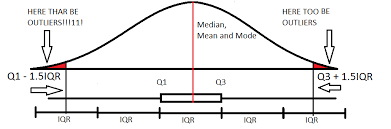

In [ ]:
#Leyendo tabla resumen

univariate_II = pd.read_csv('univariate_assesment.csv')
univariate_II.head()

,feature,count,mean,std,min,Q1,median,Q3,max,missing_rate,corr,abs_corr
0,MEDV,354.0,22.761864,9.275237,5.000,17.3250,21.550,25.000,50.000,0.000000,1.000000,1.000000
1,LSTAT,341.0,12.753138,7.274235,1.730,6.9300,11.100,17.160,36.980,0.036723,-0.744705,0.744705
2,RM,354.0,6.314153,0.708672,3.561,5.9265,6.214,6.634,8.725,0.000000,0.744229,0.744229
3,PTRATIO,354.0,18.441525,2.133292,12.600,17.4000,18.950,20.200,22.000,0.000000,-0.527838,0.527838
4,INDUS,337.0,10.831128,6.802785,0.460,5.1900,8.560,18.100,27.740,0.048023,-0.507507,0.507507


In [ ]:
# Calculando los intervalos RIC

univariate_II['ric'] = univariate_II['Q3'] - univariate_II['Q1']

univariate_II['min_ric'] = univariate_II['Q1'] - 1.5*univariate_II['ric']
univariate_II['max_ric'] = univariate_II['Q3'] + 1.5*univariate_II['ric']

univariate_II.head()

,feature,count,mean,std,min,Q1,median,Q3,max,missing_rate,corr,abs_corr,ric,min_ric,max_ric
0,MEDV,354.0,22.761864,9.275237,5.000,17.3250,21.550,25.000,50.000,0.000000,1.000000,1.000000,7.6750,5.81250,36.51250
1,LSTAT,341.0,12.753138,7.274235,1.730,6.9300,11.100,17.160,36.980,0.036723,-0.744705,0.744705,10.2300,-8.41500,32.50500
2,RM,354.0,6.314153,0.708672,3.561,5.9265,6.214,6.634,8.725,0.000000,0.744229,0.744229,0.7075,4.86525,7.69525
3,PTRATIO,354.0,18.441525,2.133292,12.600,17.4000,18.950,20.200,22.000,0.000000,-0.527838,0.527838,2.8000,13.20000,24.40000
4,INDUS,337.0,10.831128,6.802785,0.460,5.1900,8.560,18.100,27.740,0.048023,-0.507507,0.507507,12.9100,-14.17500,37.46500


In [ ]:
# Tratamiento de outliers por RIC

for col in univariate_II.feature.tolist():
  desc = univariate_II.loc[univariate_II.feature == col]

  lower_limit = desc.min_ric.values[0]
  upper_limit = desc.max_ric.values[0]

  train[col + '_tric'] = train[col].apply(lambda x: lower_limit if x <= lower_limit else
                                                    upper_limit if x >= upper_limit else
                                                    x)
train.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,...,INDUS_tric,TAX_tric,NOX_tric,AGE_tric,RAD_tric,CRIM_tric,ZN_tric,B_tric,DIS_tric,CHAS_tric
273,0.22188,20.0,6.96,1.0,0.464,7.691,51.8,4.3665,3,223,...,6.96,223,0.464,51.8,3.0,0.221880,20.0,390.77,4.3665,0.0
52,0.05360,21.0,5.64,0.0,0.439,6.511,21.1,6.8147,4,243,...,5.64,243,0.439,21.1,4.0,0.053600,21.0,396.90,6.8147,0.0
181,0.06888,0.0,2.46,0.0,0.488,6.144,62.2,2.5979,3,193,...,2.46,193,0.488,62.2,3.0,0.068880,0.0,396.90,2.5979,0.0
452,5.09017,0.0,18.10,0.0,0.713,6.297,91.8,2.3682,24,666,...,18.10,666,0.713,91.8,14.0,5.090170,0.0,385.09,2.3682,0.0
381,15.87440,0.0,18.10,0.0,0.671,6.545,99.1,1.5192,24,666,...,18.10,666,0.671,99.1,14.0,5.917033,0.0,396.90,1.5192,0.0


Revisemos los resultados

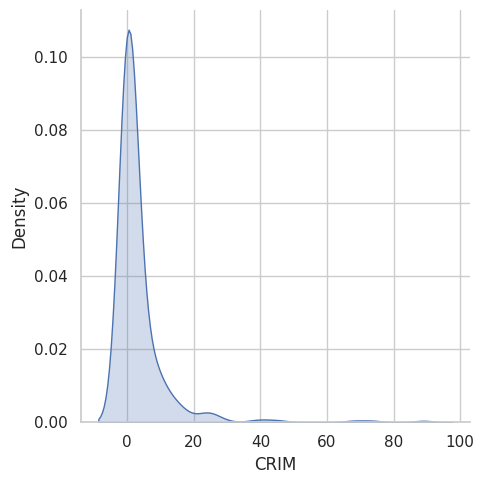

In [ ]:
sns.displot(train, x = "CRIM", kind="kde", fill=True)

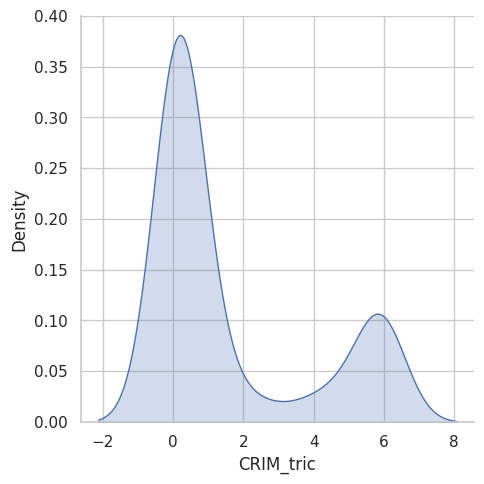

In [ ]:
sns.displot(train, x = "CRIM_tric", kind="kde", fill=True)

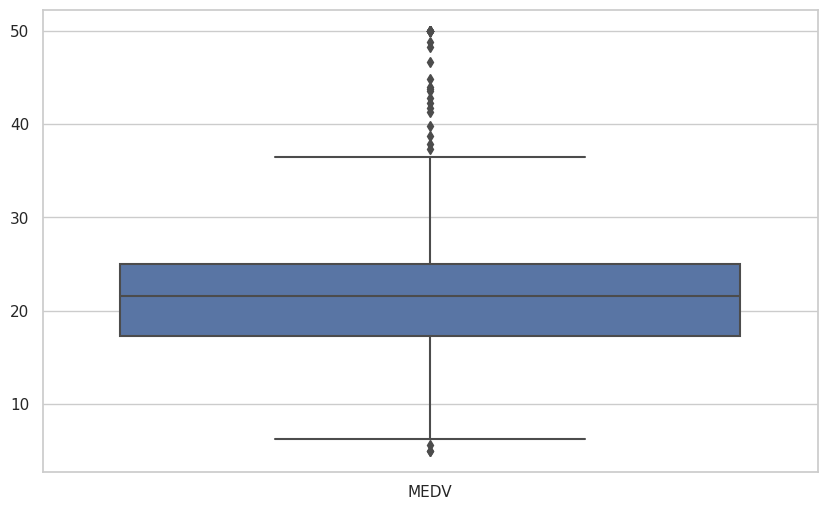

In [ ]:
ax = sns.boxplot(data=train[['MEDV']], orient="v")

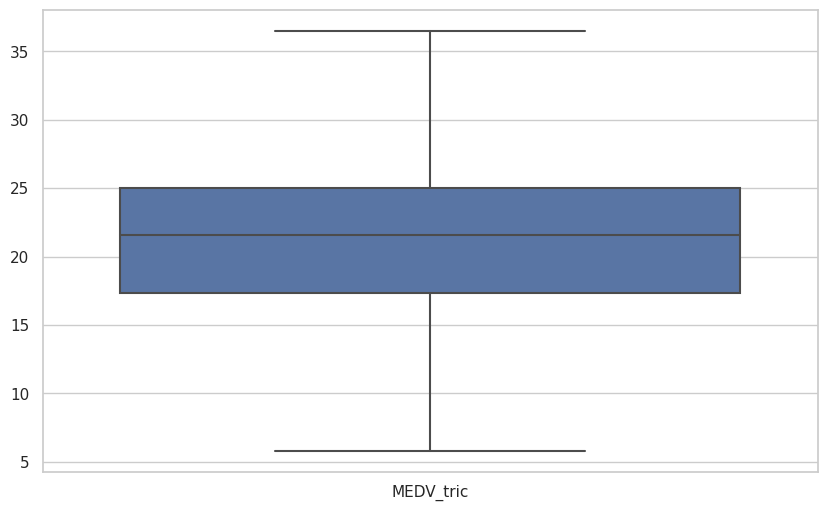

In [ ]:
ax = sns.boxplot(data=train[['MEDV_tric']], orient="v")

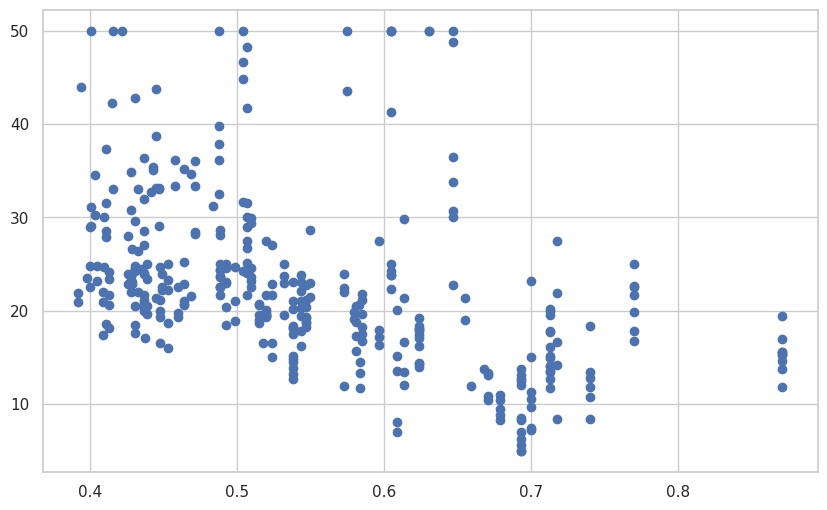

In [ ]:
plt.scatter(train.NOX, train.MEDV)

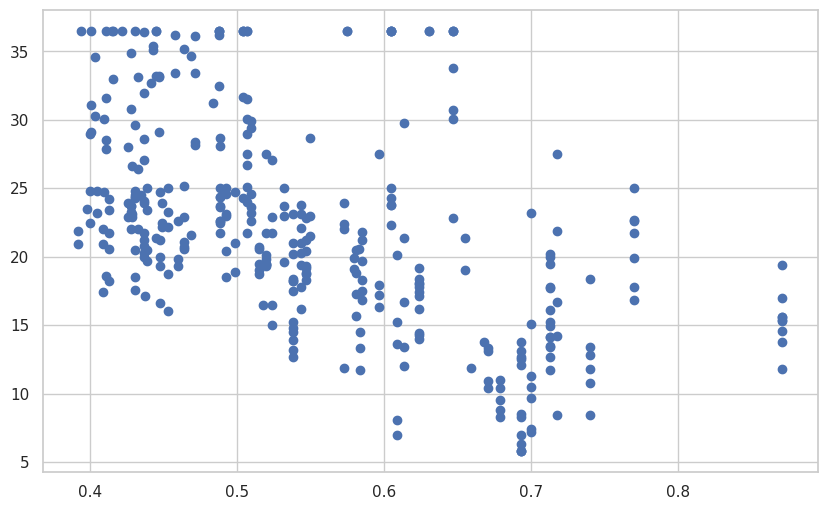

In [ ]:
plt.scatter(train.NOX_tric, train.MEDV_tric)

### Outliers por Z-score



<img src="https://editor.analyticsvidhya.com/uploads/440971.png" width="500"
     height="300" >

In [ ]:
univariate_II.head()

,feature,count,mean,std,min,Q1,median,Q3,max,missing_rate,corr,abs_corr,ric,min_ric,max_ric
0,MEDV,354.0,22.761864,9.275237,5.000,17.3250,21.550,25.000,50.000,0.000000,1.000000,1.000000,7.6750,5.81250,36.51250
1,LSTAT,341.0,12.753138,7.274235,1.730,6.9300,11.100,17.160,36.980,0.036723,-0.744705,0.744705,10.2300,-8.41500,32.50500
2,RM,354.0,6.314153,0.708672,3.561,5.9265,6.214,6.634,8.725,0.000000,0.744229,0.744229,0.7075,4.86525,7.69525
3,PTRATIO,354.0,18.441525,2.133292,12.600,17.4000,18.950,20.200,22.000,0.000000,-0.527838,0.527838,2.8000,13.20000,24.40000
4,INDUS,337.0,10.831128,6.802785,0.460,5.1900,8.560,18.100,27.740,0.048023,-0.507507,0.507507,12.9100,-14.17500,37.46500


In [ ]:
# Calculando los intervalos Z-score
# 99% 2.77
# 95% 1.96
# 90% 1.64

univariate_II['min_zscore'] = univariate_II['mean'] - 3*univariate_II['std']
univariate_II['max_zscore'] = univariate_II['mean'] + 3*univariate_II['std']

univariate_II.head()

,feature,count,mean,std,min,Q1,median,Q3,max,missing_rate,corr,abs_corr,ric,min_ric,max_ric,min_zscore,max_zscore
0,MEDV,354.0,22.761864,9.275237,5.000,17.3250,21.550,25.000,50.000,0.000000,1.000000,1.000000,7.6750,5.81250,36.51250,-5.063845,50.587574
1,LSTAT,341.0,12.753138,7.274235,1.730,6.9300,11.100,17.160,36.980,0.036723,-0.744705,0.744705,10.2300,-8.41500,32.50500,-9.069568,34.575844
2,RM,354.0,6.314153,0.708672,3.561,5.9265,6.214,6.634,8.725,0.000000,0.744229,0.744229,0.7075,4.86525,7.69525,4.188138,8.440167
3,PTRATIO,354.0,18.441525,2.133292,12.600,17.4000,18.950,20.200,22.000,0.000000,-0.527838,0.527838,2.8000,13.20000,24.40000,12.041650,24.841401
4,INDUS,337.0,10.831128,6.802785,0.460,5.1900,8.560,18.100,27.740,0.048023,-0.507507,0.507507,12.9100,-14.17500,37.46500,-9.577228,31.239483


In [ ]:
# Tratamiento de outliers por Z-score

for col in univariate_II.feature.tolist():
  desc = univariate_II.loc[univariate_II.feature == col]
  train[col + '_tzscore'] = train[col].apply(lambda x: desc.max_zscore.values[0] if x > desc.max_zscore.values[0]
                                                   else desc.min_zscore.values[0] if x < desc.min_zscore.values[0]
                                                   else x)

train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,...,INDUS_tzscore,TAX_tzscore,NOX_tzscore,AGE_tzscore,RAD_tzscore,CRIM_tzscore,ZN_tzscore,B_tzscore,DIS_tzscore,CHAS_tzscore
273,0.22188,20.0,6.96,1.0,0.464,7.691,51.8,4.3665,3,223,...,6.96,223,0.464,51.8,3,0.22188,20.0,390.77,4.3665,0.765746
52,0.05360,21.0,5.64,0.0,0.439,6.511,21.1,6.8147,4,243,...,5.64,243,0.439,21.1,4,0.05360,21.0,396.90,6.8147,0.000000
181,0.06888,0.0,2.46,0.0,0.488,6.144,62.2,2.5979,3,193,...,2.46,193,0.488,62.2,3,0.06888,0.0,396.90,2.5979,0.000000
452,5.09017,0.0,18.10,0.0,0.713,6.297,91.8,2.3682,24,666,...,18.10,666,0.713,91.8,24,5.09017,0.0,385.09,2.3682,0.000000
381,15.87440,0.0,18.10,0.0,0.671,6.545,99.1,1.5192,24,666,...,18.10,666,0.671,99.1,24,15.87440,0.0,396.90,1.5192,0.000000


Revisemos los resultados

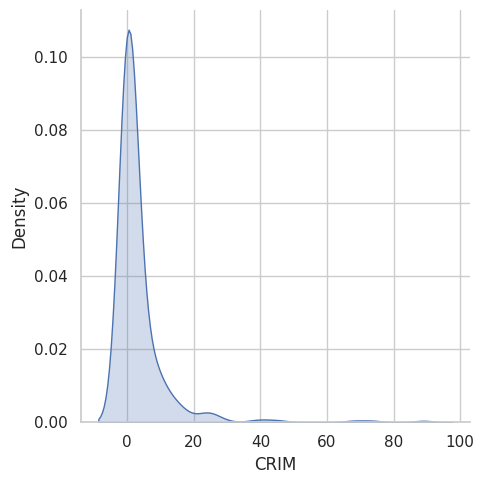

In [ ]:
sns.displot(train, x = "CRIM", kind="kde", fill=True)

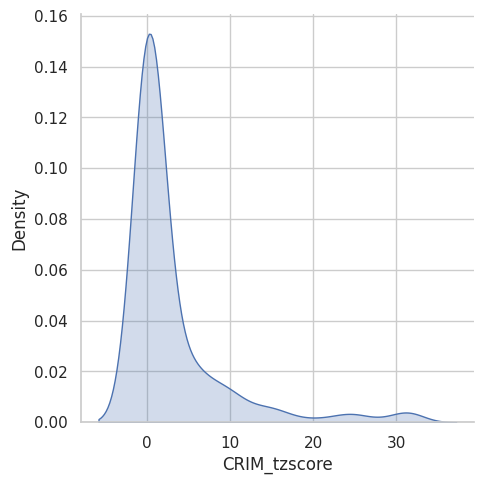

In [ ]:
sns.displot(train, x = "CRIM_tzscore", kind="kde", fill=True)

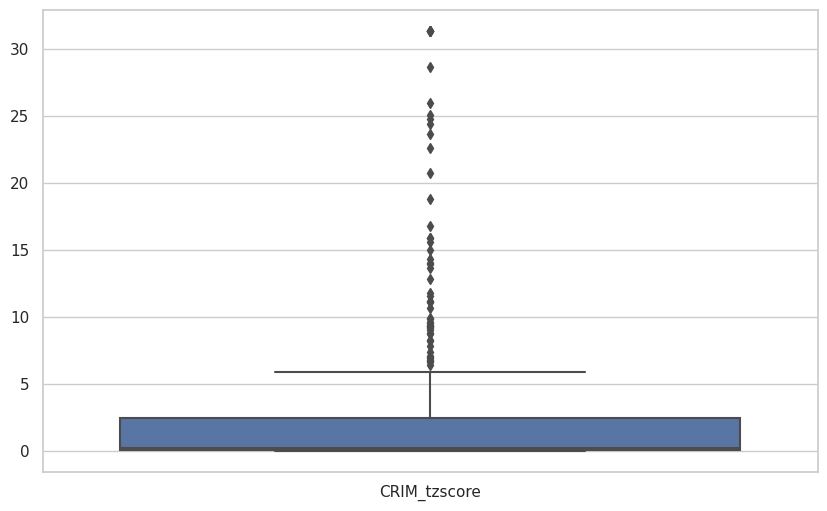

In [ ]:
ax = sns.boxplot(data=train[['CRIM_tzscore']], orient="v")

In [ ]:
univariate_II.to_csv('univariate_assesment.csv', index = 0)

### Tratamiento de Missings

In [ ]:
all_features = train.columns.tolist()

In [ ]:
all_features

['CRIM',
 'ZN',
 'INDUS',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT',
 'MEDV',
 'MEDV_tric',
 'LSTAT_tric',
 'RM_tric',
 'PTRATIO_tric',
 'INDUS_tric',
 'TAX_tric',
 'NOX_tric',
 'AGE_tric',
 'RAD_tric',
 'CRIM_tric',
 'ZN_tric',
 'B_tric',
 'DIS_tric',
 'CHAS_tric',
 'MEDV_tzscore',
 'LSTAT_tzscore',
 'RM_tzscore',
 'PTRATIO_tzscore',
 'INDUS_tzscore',
 'TAX_tzscore',
 'NOX_tzscore',
 'AGE_tzscore',
 'RAD_tzscore',
 'CRIM_tzscore',
 'ZN_tzscore',
 'B_tzscore',
 'DIS_tzscore',
 'CHAS_tzscore']

In [ ]:
# Trataiento de missings

train[[x + '_imp' for x in all_features]] = train.fillna(train[all_features].median())


In [ ]:
train[[x + '_imp' for x in all_features if '_tric' in x]].head(30)

,MEDV_tric_imp,LSTAT_tric_imp,RM_tric_imp,PTRATIO_tric_imp,INDUS_tric_imp,TAX_tric_imp,NOX_tric_imp,AGE_tric_imp,RAD_tric_imp,CRIM_tric_imp,ZN_tric_imp,B_tric_imp,DIS_tric_imp,CHAS_tric_imp
273,35.2000,6.580,7.69100,18.6,6.96,223,0.4640,51.8,3.0,0.221880,20.00,390.770,4.3665,0.0
52,25.0000,5.280,6.51100,16.8,5.64,243,0.4390,21.1,4.0,0.053600,21.00,396.900,6.8147,0.0
181,36.2000,9.450,6.14400,17.8,2.46,193,0.4880,62.2,3.0,0.068880,0.00,396.900,2.5979,0.0
452,16.1000,17.270,6.29700,20.2,18.10,666,0.7130,91.8,14.0,5.090170,0.00,385.090,2.3682,0.0
381,10.9000,21.080,6.54500,20.2,18.10,666,0.6710,99.1,14.0,5.917033,0.00,396.900,1.5192,0.0
192,36.4000,2.870,7.17800,15.2,3.44,398,0.4370,26.3,5.0,0.222120,31.25,390.490,6.4798,0.0
482,25.0000,7.010,7.06100,20.2,18.10,666,0.5320,77.0,14.0,5.731160,0.00,395.280,3.4106,0.0
104,20.1000,12.330,6.16700,20.9,8.56,384,0.5200,90.0,5.0,0.139600,0.00,392.690,2.4210,0.0
500,16.8000,14.330,6.02700,19.2,9.69,391,0.5850,79.7,6.0,0.224380,0.00,396.900,2.4982,0.0
481,23.7000,7.740,6.75000,20.2,18.10,666,0.5320,74.9,14.0,5.708180,0.00,393.070,3.3317,0.0


## 5. Modelo de regresión Lineal

### Rregresión lineal por máxima verosimilitud

In [ ]:
features_in = [x + '_imp' for x in all_features if ('_tric' in x) & ('CHAS' not in x) & ('MEDV' not in x)]


In [ ]:
# estandarizando las variables para mantener todas en una misma escala
train[[x + '_std' for x in features_in]] = (train[features_in] - train[features_in].mean())/train[features_in].std()


In [ ]:
# Utilizamos el target con tratamiento de outliers, debido a que no es necesario estandarizar ni hacer tratamiento de missings en este (solo aplica para el target)
[x for x in train.columns.tolist() if 'MEDV' in x]


['MEDV',
 'MEDV_tric',
 'MEDV_tzscore',
 'MEDV_imp',
 'MEDV_tric_imp',
 'MEDV_tzscore_imp']

In [ ]:
import statsmodels.api as sm

# Fit and summarize OLS model
mod = sm.OLS(train.MEDV_tric,
             sm.add_constant(train[[x + '_std' for x in features_in]]))
res = mod.fit()


In [ ]:
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:              MEDV_tric   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     110.0
Date:                Sat, 20 May 2023   Prob (F-statistic):          2.42e-109
Time:                        00:43:29   Log-Likelihood:                -937.36
No. Observations:                 354   AIC:                             1901.
Df Residuals:                     341   BIC:                             1951.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   22.0443 

In [ ]:
mod = sm.OLS(train.MEDV_tric, sm.add_constant(train[['LSTAT_tric_imp_std',
                                              'RM_tric_imp_std',
                                              'PTRATIO_tric_imp_std',
                                              'INDUS_tric_imp_std',
                                              'TAX_tric_imp_std',
                                              'NOX_tric_imp_std',
                                              'AGE_tric_imp_std',
                                              'RAD_tric_imp_std',
                                              'CRIM_tric_imp_std',
                                              'ZN_tric_imp_std',
                                              'DIS_tric_imp_std']]))
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:              MEDV_tric   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     120.4
Date:                Sat, 20 May 2023   Prob (F-statistic):          2.15e-110
Time:                        00:43:29   Log-Likelihood:                -937.37
No. Observations:                 354   AIC:                             1899.
Df Residuals:                     342   BIC:                             1945.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   22.0443 

In [ ]:
mod = sm.OLS(train.MEDV_tric, sm.add_constant(train[['LSTAT_tric_imp_std',
                                              'RM_tric_imp_std',
                                              'PTRATIO_tric_imp_std',
                                              'TAX_tric_imp_std',
                                              'NOX_tric_imp_std',
                                              'AGE_tric_imp_std',
                                              'RAD_tric_imp_std',
                                              'CRIM_tric_imp_std',
                                              'ZN_tric_imp_std',
                                              'DIS_tric_imp_std']]))
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:              MEDV_tric   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.789
Method:                 Least Squares   F-statistic:                     132.7
Date:                Sat, 20 May 2023   Prob (F-statistic):          1.95e-111
Time:                        00:43:29   Log-Likelihood:                -937.43
No. Observations:                 354   AIC:                             1897.
Df Residuals:                     343   BIC:                             1939.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   22.0443 

In [ ]:
mod = sm.OLS(train.MEDV_tric, sm.add_constant(train[['LSTAT_tric_imp_std',
                                              'RM_tric_imp_std',
                                              'PTRATIO_tric_imp_std',
                                              'TAX_tric_imp_std',
                                              'NOX_tric_imp_std',
                                              'AGE_tric_imp_std',
                                              'RAD_tric_imp_std',
                                              'ZN_tric_imp_std',
                                              'DIS_tric_imp_std']]))
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:              MEDV_tric   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.789
Method:                 Least Squares   F-statistic:                     147.8
Date:                Sat, 20 May 2023   Prob (F-statistic):          1.67e-112
Time:                        00:43:29   Log-Likelihood:                -937.51
No. Observations:                 354   AIC:                             1895.
Df Residuals:                     344   BIC:                             1934.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   22.0443 

In [ ]:
mod = sm.OLS(train.MEDV_tric, sm.add_constant(train[['LSTAT_tric_imp_std',
                                              'RM_tric_imp_std',
                                              'PTRATIO_tric_imp_std',
                                              'TAX_tric_imp_std',
                                              'NOX_tric_imp_std',
                                              'RAD_tric_imp_std',
                                              'ZN_tric_imp_std',
                                              'DIS_tric_imp_std']]))
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:              MEDV_tric   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.789
Method:                 Least Squares   F-statistic:                     165.9
Date:                Sat, 20 May 2023   Prob (F-statistic):          2.51e-113
Time:                        00:43:30   Log-Likelihood:                -938.22
No. Observations:                 354   AIC:                             1894.
Df Residuals:                     345   BIC:                             1929.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   22.0443 

In [ ]:
mod = sm.OLS(train.MEDV_tric, sm.add_constant(train[['LSTAT_tric_imp_std',
                                              'RM_tric_imp_std',
                                              'PTRATIO_tric_imp_std',
                                              'TAX_tric_imp_std',
                                              'NOX_tric_imp_std',
                                              'RAD_tric_imp_std',
                                              'DIS_tric_imp_std']]))
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:              MEDV_tric   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     187.9
Date:                Sat, 20 May 2023   Prob (F-statistic):          9.21e-114
Time:                        00:43:30   Log-Likelihood:                -939.93
No. Observations:                 354   AIC:                             1896.
Df Residuals:                     346   BIC:                             1927.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   22.0443 


* <b>crim : </b> Tasa de criminalidad per cápita por ciudad.

* <b>zn : </b> Proporción de terreno residencial dividido en zonas para lotes de más de 25,000 pies cuadrados.

* <b>indus : </b> Proporción de acres comerciales no minoristas por ciudad.

* <b>chas : </b> Variable ficticia de Charles River (= 1 si el tramo limita con el río; 0 en caso contrario).

* <b>nox : </b>Concentración de óxidos de nitrógeno (partes por 10 millones).

* <b>rm : </b>Número medio de habitaciones por vivienda.

* <b>años : </b> Proporción de unidades ocupadas por sus propietarios construidas antes de 1940.

* <b>dis : </b>Media ponderada de las distancias a cinco centros de empleo de Boston.

* <b>rad : </b>Indice de accesibilidad a carreteras radiales.

* <b>impuesto : </b>Tasa de impuesto a la propiedad de valor total por \$ 10,000.

* <b>ptratio : </b>Proporción alumno-profesor por ciudad.

* <b>black : </b> 1000 (Bk - 0.63) ^ 2 donde Bk es la proporción de negros por ciudad.

* <b>lstat : </b>Estatus más bajo de la población (porcentaje).

* <b>medv : </b>Valor medio de las viviendas ocupadas por sus propietarios en \$ 1000.

---


In [ ]:
mod = sm.OLS(train.MEDV_tric, sm.add_constant(train[['LSTAT_tric_imp_std',
                                              'RM_tric_imp_std',
                                              'PTRATIO_tric_imp_std',
                                              'NOX_tric_imp_std',
                                              'DIS_tric_imp_std']]))
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:              MEDV_tric   R-squared:                       0.782
Model:                            OLS   Adj. R-squared:                  0.779
Method:                 Least Squares   F-statistic:                     249.9
Date:                Sat, 20 May 2023   Prob (F-statistic):          8.25e-113
Time:                        00:47:18   Log-Likelihood:                -947.85
No. Observations:                 354   AIC:                             1908.
Df Residuals:                     348   BIC:                             1931.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   22.0443 

In [ ]:
train[['LSTAT_tric_imp_std',
       'RM_tric_imp_std',
       'PTRATIO_tric_imp_std',
       'NOX_tric_imp_std',
       'DIS_tric_imp_std']].corr()

,LSTAT_tric_imp_std,RM_tric_imp_std,PTRATIO_tric_imp_std,NOX_tric_imp_std,DIS_tric_imp_std
LSTAT_tric_imp_std,1.000000,-0.633416,0.389378,0.622183,-0.520467
RM_tric_imp_std,-0.633416,1.000000,-0.365316,-0.346815,0.225544
PTRATIO_tric_imp_std,0.389378,-0.365316,1.000000,0.219223,-0.237534
NOX_tric_imp_std,0.622183,-0.346815,0.219223,1.000000,-0.772026
DIS_tric_imp_std,-0.520467,0.225544,-0.237534,-0.772026,1.000000


In [ ]:
# Nos quedaremos con variables con correlación menor al 60%


In [ ]:
train[['LSTAT_tric_imp_std',
       'RM_tric_imp_std',
       'PTRATIO_tric_imp_std',
       'DIS_tric_imp_std']].corr()

,LSTAT_tric_imp_std,RM_tric_imp_std,PTRATIO_tric_imp_std,DIS_tric_imp_std
LSTAT_tric_imp_std,1.000000,-0.633416,0.389378,-0.520467
RM_tric_imp_std,-0.633416,1.000000,-0.365316,0.225544
PTRATIO_tric_imp_std,0.389378,-0.365316,1.000000,-0.237534
DIS_tric_imp_std,-0.520467,0.225544,-0.237534,1.000000


In [ ]:
univariate_II

In [ ]:
mod = sm.OLS(train.MEDV_tric, sm.add_constant(train[['LSTAT_tric_imp_std',
                                              'RM_tric_imp_std',
                                              'PTRATIO_tric_imp_std',
                                              'DIS_tric_imp_std']]))
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:              MEDV_tric   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     282.2
Date:                Sat, 20 May 2023   Prob (F-statistic):          5.79e-108
Time:                        00:52:20   Log-Likelihood:                -962.18
No. Observations:                 354   AIC:                             1934.
Df Residuals:                     349   BIC:                             1954.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   22.0443 

## Indicadores

In [ ]:
train['MEDV_pred'] = (22.0443 - 4.0729*train.LSTAT_tric_imp_std
                              + 2.4565*train.RM_tric_imp_std
                              - 1.6619*train.PTRATIO_tric_imp_std
                              - 0.4832*train.DIS_tric_imp_std)


In [ ]:
train[['MEDV_tric', 'MEDV_pred']].head()

,MEDV_tric,MEDV_pred
273,35.2,30.763449
52,25.0,27.748763
181,36.2,24.090760
452,16.1,18.331808
381,10.9,17.295484


In [ ]:
from sklearn.metrics import *

In [ ]:
r2_score(train.MEDV_tric, train.MEDV_pred)

0.7638077480961516

In [ ]:
mean_absolute_percentage_error(train.MEDV_tric, train.MEDV_pred)

0.14719635864382447

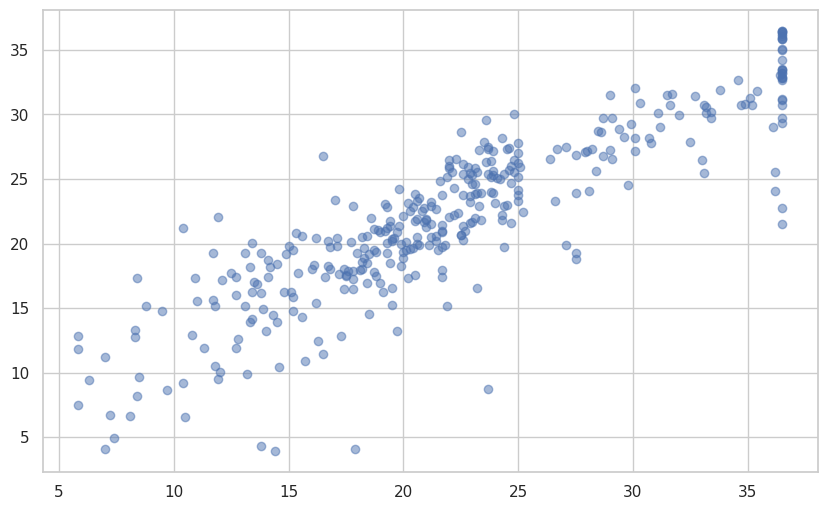

In [ ]:
plt.scatter(train.MEDV_tric, train.MEDV_pred, alpha = 0.5)

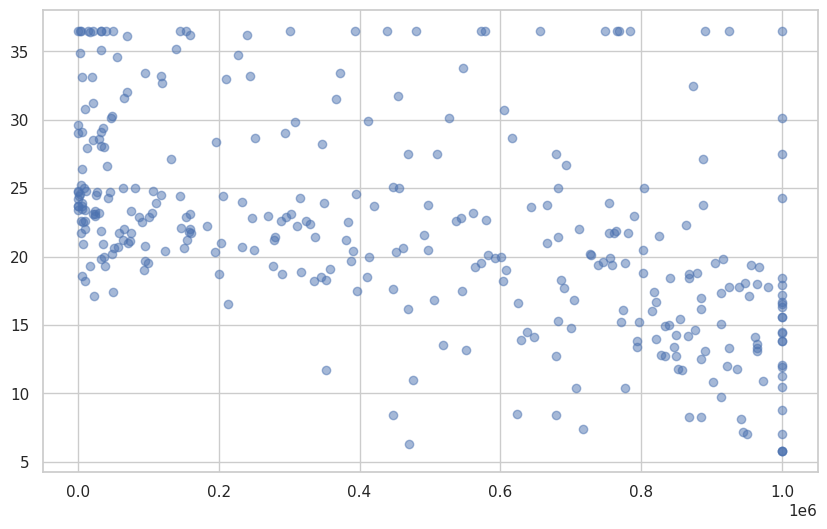

In [ ]:
plt.scatter(train.AGE_tric**3, train.MEDV_tric, alpha = 0.5)

In [ ]:
temp = train[['MEDV_tric', 'AGE_tric']].dropna()



0.2245672430878772

In [ ]:

for i in [1, 2, 3, 4, 5]:
  temp = train[['MEDV_tric', 'AGE_tric']].copy().dropna()
  temp['AGE_tric'] = temp['AGE_tric']**i
  print(f"grado {i} R : {temp.corr()[:1].AGE_tric.values[0]**2}")


grado 1 R : 0.2245672430878772
grado 2 R : 0.25210234987351987
grado 3 R : 0.2639641263748875
grado 4 R : 0.26795445890048025
grado 5 R : 0.26776088463370834
